In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [2]:
epl=pd.read_csv("C:/Users/ASUS/Desktop/DS SM/ML/Project/eplmatches.csv")
epl

,Season_End_Year,Wk,Date,Home,HomeGoals,AwayGoals,Away,FTR
0,1993,1,1992-08-15,Coventry City,2,1,Middlesbrough,H
1,1993,1,1992-08-15,Leeds United,2,1,Wimbledon,H
2,1993,1,1992-08-15,Sheffield Utd,2,1,Manchester Utd,H
3,1993,1,1992-08-15,Crystal Palace,3,3,Blackburn,D
4,1993,1,1992-08-15,Arsenal,2,4,Norwich City,A
...,...,...,...,...,...,...,...,...
11641,2022,9,2021-10-23,Leeds United,1,1,Wolves,D
11642,2022,9,2021-10-23,Brighton,1,4,Manchester City,A
11643,2022,9,2021-10-24,West Ham,1,0,Tottenham,H
11644,2022,9,2021-10-24,Brentford,1,2,Leicester City,A


In [3]:
homegames=epl.iloc[:,[3,4,5,7]]
homegames

,Home,HomeGoals,AwayGoals,FTR
0,Coventry City,2,1,H
1,Leeds United,2,1,H
2,Sheffield Utd,2,1,H
3,Crystal Palace,3,3,D
4,Arsenal,2,4,A
...,...,...,...,...
11641,Leeds United,1,1,D
11642,Brighton,1,4,A
11643,West Ham,1,0,H
11644,Brentford,1,2,A


In [4]:
homegamescore=homegames.iloc[:,[1,2]]
homegamescore

,HomeGoals,AwayGoals
0,2,1
1,2,1
2,2,1
3,3,3
4,2,4
...,...,...
11641,1,1
11642,1,4
11643,1,0
11644,1,2


In [5]:
wcss=[]
for i in range(1,5):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=1)
    kmeans.fit(homegamescore)
    wcss.append(kmeans.inertia_)

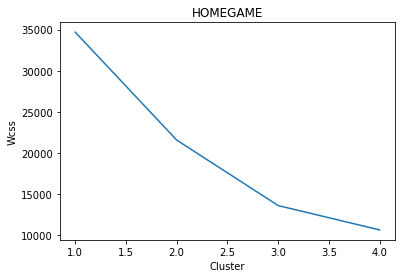

In [6]:
plt.plot(range(1,5),wcss)
plt.title("HOMEGAME")
plt.xlabel('Cluster')
plt.ylabel('Wcss')
plt.show()

In [7]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=1)
model=kmeans.fit_predict(homegamescore)
model

array([2, 2, 2, ..., 2, 1, 1])

In [8]:
model_series=pd.Series(model)

In [9]:
model_series

0        2
1        2
2        2
3        1
4        1
        ..
11641    2
11642    1
11643    2
11644    1
11645    1
Length: 11646, dtype: int32

In [10]:
homegamescore['Cluster']=model_series
homegamescore

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16996\2056868697.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  homegamescore['Cluster']=model_series


,HomeGoals,AwayGoals,Cluster
0,2,1,2
1,2,1,2
2,2,1,2
3,3,3,1
4,2,4,1
...,...,...,...
11641,1,1,2
11642,1,4,1
11643,1,0,2
11644,1,2,1


In [11]:
homegamescore.groupby(homegamescore.Cluster).mean()

,HomeGoals,AwayGoals
Cluster,,
0,3.627442,0.892558
1,1.085011,2.599553
2,1.023559,0.506361


In [12]:
#0 = Home Lose
#1=  Draw
#2= Home Win